In [2]:
import pandas as pd
import matplotlib.pyplot as pl
from pprint import pprint
from glob import glob
import pandas as pd
import numpy as np

pl.rcParams['figure.figsize'] = [10,10]
pl.rcParams.update({'font.size': 25})

In [3]:
pprint(glob('test_im/*.csv'))

['test_im/gold.csv',
 'test_im/cameraman.csv',
 'test_im/barb.csv',
 'test_im/pp1205.csv',
 'test_im/lena.easy.csv']


In [4]:
N, x, y = 160, 2, 2
pprint(glob(f'{N}_{x}_{y}/*.csv'))

['160_2_2/gold.csv',
 '160_2_2/cameraman.csv',
 '160_2_2/barb.csv',
 '160_2_2/pp1205.csv',
 '160_2_2/lena.easy.csv']


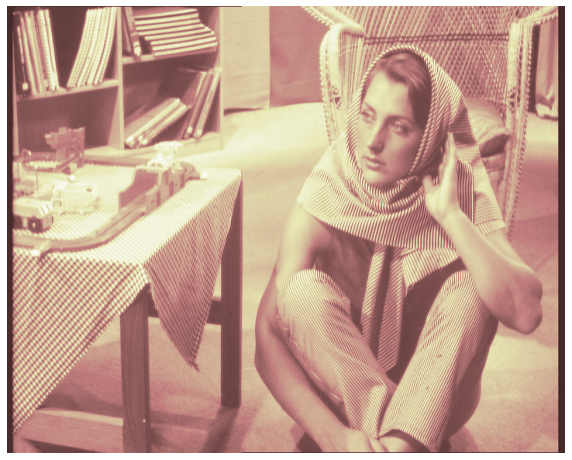

In [122]:
pic_name = 'barb.csv'
im = pd.read_csv(f'test_im/{pic_name}',header=None)
pl.imshow(im.to_numpy(),cmap='pink')
pl.grid(False)
pl.axis(False)
pl.show()

160 2 2


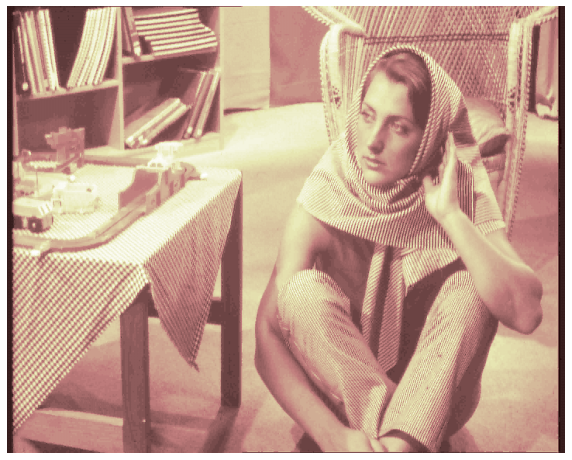

In [138]:
print(N,x,y)
im = pd.read_csv(f'{N}_{x}_{y}/{pic_name}',header=None)
pl.imshow(im.to_numpy(),cmap='pink')
pl.grid(False)
pl.axis(False)
pl.show()

In [34]:
dirs = glob(r'[1-9]0_*') + glob(r'[123456789]?0_*')
pics = glob('test_im/*.csv')
t_dir = pics[0].split('/')[0]
pics = [i.split('/')[1] for i in pics]

In [35]:
pprint(dirs)
pprint(pics)

['60_8_8',
 '20_4_8',
 '40_4_2',
 '40_2_2',
 '20_2_8',
 '80_8_8',
 '60_8_2',
 '60_4_4',
 '40_8_8',
 '80_4_2',
 '40_8_4',
 '20_1_2',
 '20_8_4',
 '40_2_1',
 '20_4_2',
 '20_4_4',
 '40_8_2',
 '60_4_1',
 '80_8_2',
 '80_4_1',
 '40_1_2',
 '20_1_4',
 '20_8_2',
 '20_2_2',
 '80_2_4',
 '60_1_4',
 '60_8_4',
 '20_8_8',
 '60_8_1',
 '20_2_4',
 '80_2_2',
 '60_2_4',
 '60_1_8',
 '40_4_8',
 '60_4_8',
 '20_4_1',
 '40_4_4',
 '60_2_8',
 '80_8_4',
 '40_1_4',
 '20_2_1',
 '80_4_4',
 '40_2_8',
 '80_4_8',
 '80_2_8',
 '80_1_4',
 '40_2_4',
 '40_4_1',
 '60_2_2',
 '60_4_2',
 '640_4_2',
 '320_8_4',
 '160_2_2',
 '160_2_4',
 '100_4_4',
 '320_8_8',
 '100_2_8',
 '140_4_8',
 '100_8_2',
 '160_4_2',
 '100_1_2',
 '320_4_4',
 '120_4_1',
 '320_4_8',
 '100_2_4',
 '140_2_4',
 '120_8_8',
 '120_2_8',
 '120_4_8',
 '100_2_1',
 '120_1_4',
 '640_2_8',
 '160_4_8',
 '640_8_4',
 '100_1_8',
 '100_4_2',
 '140_8_8',
 '140_1_4',
 '120_8_4',
 '140_8_4',
 '160_4_4',
 '120_2_2',
 '100_1_4',
 '320_1_4',
 '320_8_1',
 '120_4_2',
 '640_8_1',
 '120_

In [36]:
mse = lambda x,y: np.sum((x - y)**2)/x.shape[0]
psnr = lambda x,y: 10*np.log10(255**2/(mse(x,y)))
R = lambda N,size: np.log2(N)/size

In [38]:
res = {'N': list(), 'x': list(), 'y': list(), 'psnr': list(), 'R': list(), 'file': list()}

In [39]:
for d in dirs:
    N,x,y = [int(i) for i in d.split('_')]
    for pic in pics:
        res['N'].append(N)
        res['x'].append(x)
        res['y'].append(y)
        res['file'].append(pic[:-4])
        og_im = pd.read_csv(f'test_im/{pic}',header=None).to_numpy().reshape(-1,1).squeeze()
        gen_im = pd.read_csv(f'{d}/{pic}', header=None).to_numpy().reshape(-1,1).squeeze()
        res['psnr'].append(psnr(og_im,gen_im))
        res['R'].append(R(N,x*y))

df = pd.DataFrame(res)
df.to_csv('res_2.csv',index=False)

In [43]:
df['dim'] = df['x'] + df['y']
cols = {20: 0, 40: 1, 60: 2, 80: 3, 100: 4, 120: 5}
df['col'] = df['N'].map(cols)

In [45]:
#col = ['r', 'g', 'b', 'y', 'o', 'c']
lab = [r'$N=20$', r'$N=40$', r'$N=60$', r'$N=80$', r'$N=100$', r'$N=120$', r'$N=140$', r'$N=160$', r'$N=$']

aux = df[['psnr', 'R', 'dim']]
a = [aux.loc[df['N'] == i] for i in [20, 40, 60, 80, 100, 120, 140, 160]]#, aux.loc[df['N'] == 40], aux.loc[df['N'] == 80], aux.loc[df['N'] == 160]]

for d,N in zip(a,lab):#zip(col,lab,a):
    Rs = list(); psnrs = list(); dims = list()
    for _,(p,R,s) in d.iterrows():
        Rs.append(R)
        psnrs.append(p)
        dims.append(s*10)
    pl.scatter(Rs,psnrs,label=N)
pl.legend(ncol=2)
pl.grid(True)
pl.xlabel(r'$R$')
pl.ylabel(r'$PSNR~[dB]$')
pl.show()

In [41]:
%matplotlib
pl.rcParams['figure.figsize'] = [20,10]
pl.rcParams.update({'font.size': 18})

Using matplotlib backend: TkAgg
